<a href="https://colab.research.google.com/github/nehagoyal1994/cs480student/blob/main/05/Neha_Goyal_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

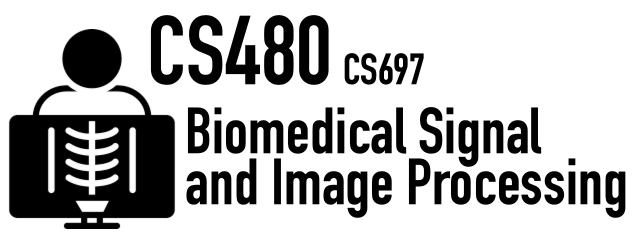
#Assignment 5

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 8.1MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

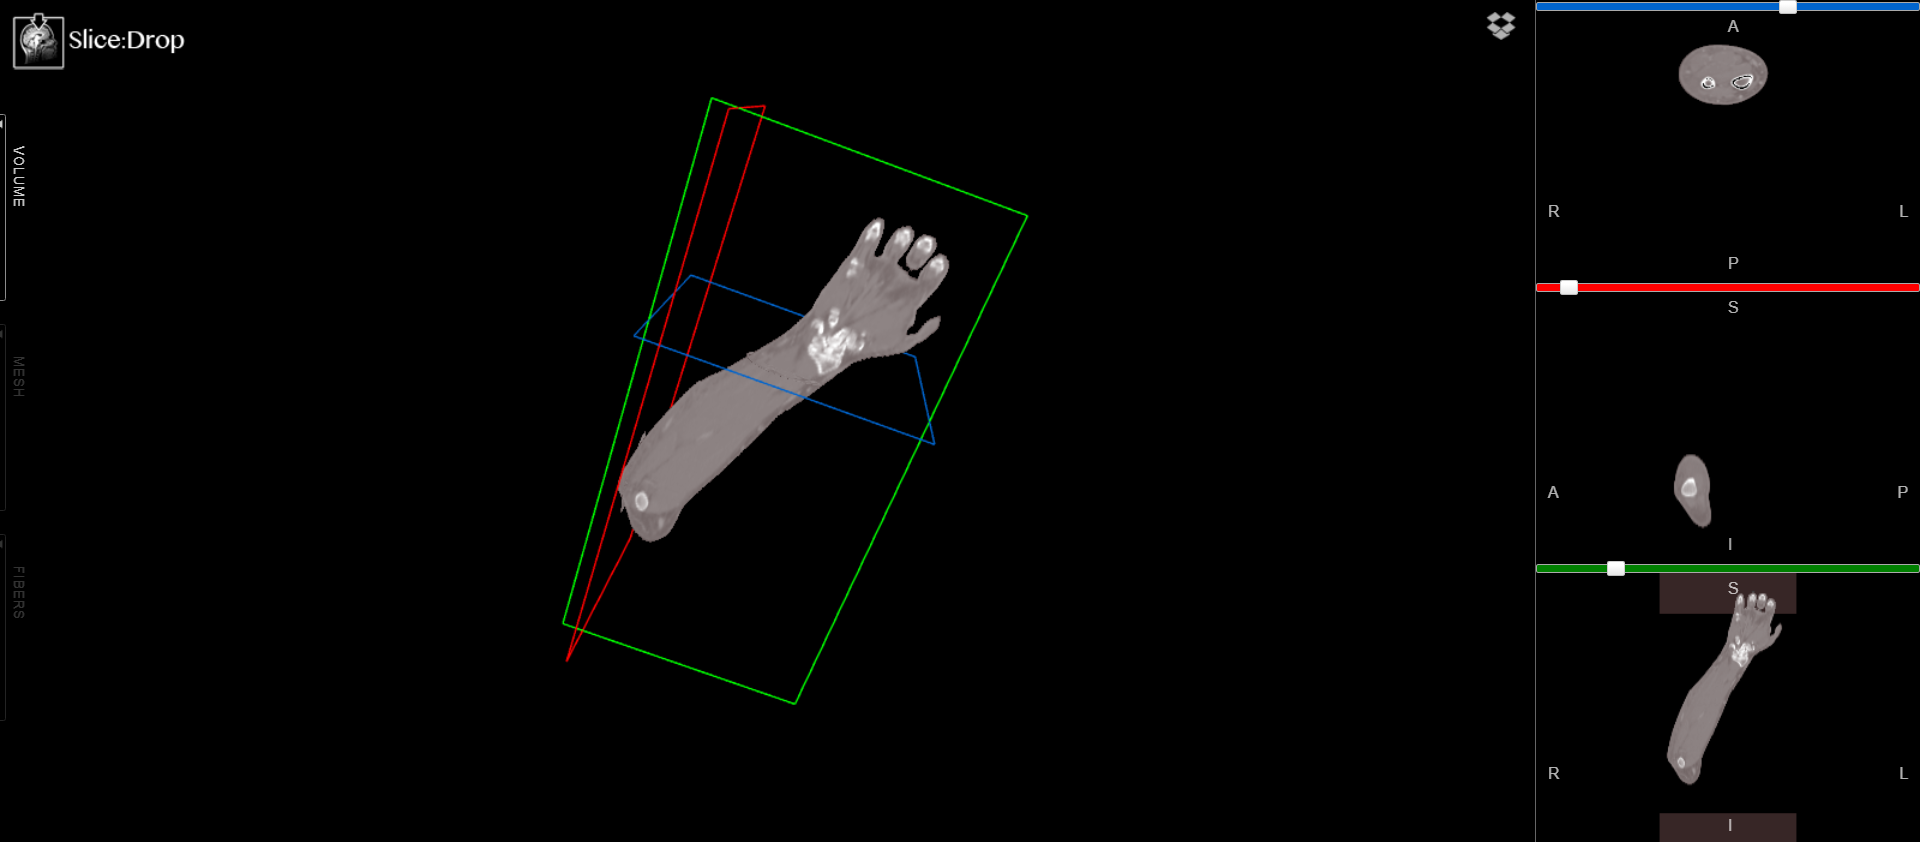

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [9]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')



In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [10]:
from pydicom import dcmread
import os, pydicom

In [11]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [193]:


dicom_files = [dcmread('ct' + '/' + filename) for filename in os.listdir('ct/')]
dicom_files.sort(key = lambda x: int(x.InstanceNumber))


first_image =  dicom_files[0]

# pixel aspects, assuming all slices are the same
ps = first_image.PixelSpacing
st = first_image.SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/st
cor_aspect = st/ps[0]

#3d array
dimention_3d = (int(first_image.Rows), int(first_image.Columns), len(dicom_files))
# print(dimention_3d)
dicom_array = numpy.zeros(dimention_3d, dtype=first_image.pixel_array.dtype)

for i, filename in enumerate(dicom_files):
  loaded_image2D = filename.pixel_array
  dicom_array[:, :, i] = loaded_image2D



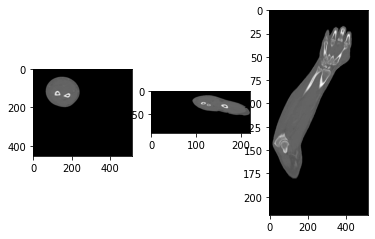

In [194]:
# TODO: YOUR CODE FOR AXIAL

a1 = plt.subplot(1,3 , 1)
plt.imshow(dicom_array[:, :, dimention_3d[2]//2], cmap = 'gray')
a1.set_aspect(ax_aspect)


# TODO: YOUR CODE FOR SAGITTAL

a2 = plt.subplot(1, 3, 2)
plt.imshow(dicom_array[:, dimention_3d[2]//2, :], cmap = 'gray')
a2.set_aspect(sag_aspect)


# TODO: YOUR CODE FOR CORONAL

a3 = plt.subplot(1, 3, 3)
plt.imshow(dicom_array[dimention_3d[2]//2, :, :].T, cmap = 'gray')
a3.set_aspect(cor_aspect)


# plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [195]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [196]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [197]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue: return int(x[0])
    else: return int(x)
    
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [198]:
for filename in os.listdir('ct/'):
  file = dcmread('ct' + '/' + filename)
  
  print('File name : ' + filename)
  print(file[0x0028, 0x1050])
  print(file[0x0028, 0x1051])
  print(file[0x0028, 0x1052])




File name : IM-0001-0042.dcm
(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
File name : IM-0001-0077.dcm
(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
File name : IM-0001-0218.dcm
(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
File name : IM-0001-0051.dcm
(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
File name : IM-0001-0193.dcm
(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0

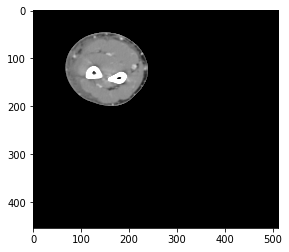

In [199]:
data = dicom_files[110]  
image = data.pixel_array
level , window, rescale, slope = get_windowing(data)
image = (image*slope) + rescale  #for translation adjustments given in the dicom file. 
image_min = level - window//2 #minimum HU level
image_max = level + window//2 #maximum HU level

output = image

plt.imshow(output, cmap='gray', vmin = image_min, vmax = image_max) 
plt.show()

In [200]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [201]:
# Fat tissue window 
# Level: -50 HU; Width: 100 HU 

level = -50 
window = 100

image_min1 = level - window//2 #minimum HU level
image_max1 = level + window//2 #maximum HU level

In [202]:
# Soft tissue window 
# Level: +50 HU; Width: +200 HU (Range: −125 to +225)

level = 50 
window = 200

image_min2 = level - window//2 #minimum HU level
image_max2 = level + window//2 #maximum HU level


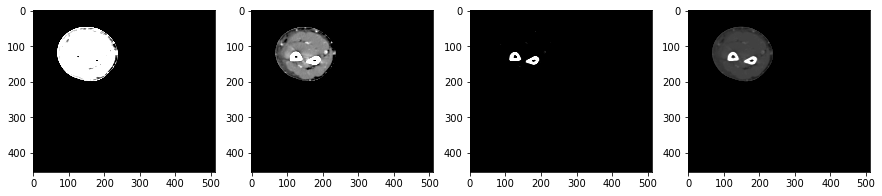

In [203]:
# Bone window 
# Level: +300 HU; Width: +400, +1000 HU (Range: −700 to +1300)


level = 300 
window = 400

image_min3 = level - window//2 #minimum HU level
image_max3 = level + window//2 #maximum HU level

level = 300
window = 1000

image_min4 = level - window//2 #minimum HU level
image_max4 = level + window//2 #maximum HU level


f, axarr = plt.subplots(1,4, figsize=(15,10))


axarr[0].imshow(output, cmap='gray', vmin = image_min1, vmax = image_max1) 
axarr[1].imshow(output, cmap='gray', vmin = image_min2, vmax = image_max2)
axarr[2].imshow(output, cmap='gray', vmin = image_min3, vmax = image_max3)
axarr[3].imshow(output, cmap='gray', vmin = image_min4, vmax = image_max4) 

In [204]:
# Which values make sense and why?

In [205]:
# first image is of fat tisuue
# second image is soft tissue
# third and fourth images are bone tissue
# to me soft bone tissue range image make more sense since its gives better visulization.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [206]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [207]:
# def view_images(files, title = ''):
#   width = 1
#   height = 3
#   fig, axs = plt.subplots(height, width, figsize=(15,15))
    
#   for im in range(0, height * width):
    
    
#     axs = axs[i//width, im%width]
    
#     axs.imshow(new_mask[99 + im :, :].T, cmap='gray') 
#     axs.set_aspect(cor_aspect)
#     axs.axis('off')         
  
#   plt.suptitle(title)
#   plt.show()

In [208]:
# could not produce for 3 slices so applied on 3d volume instead

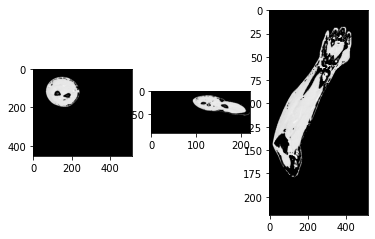

In [221]:
# TODO: YOUR CODE TO SEGMENT FAT



new_mask = (dicom_array.copy()).astype(np.int16)

new_mask[new_mask  < 1000 ] = 0
new_mask[new_mask  > 1200 ] = 0


a1 = plt.subplot(1,3 , 1)
plt.imshow(new_mask[:, :, 110], cmap = 'gray')
a1.set_aspect(ax_aspect)


# TODO: YOUR CODE FOR SAGITTAL

a2 = plt.subplot(1, 3, 2)
plt.imshow(new_mask[:, 110, :], cmap = 'gray')
a2.set_aspect(sag_aspect)


# TODO: YOUR CODE FOR CORONAL

a3 = plt.subplot(1, 3, 3)
plt.imshow(new_mask[110, :, :].T, cmap = 'gray')
a3.set_aspect(cor_aspect)

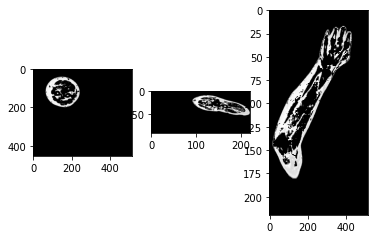

In [224]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE



new_mask = (dicom_array.copy()).astype(np.int16)


new_mask[new_mask + rescale > 50 ] = 0


a1 = plt.subplot(1,3 , 1)
plt.imshow(new_mask[:, :,110], cmap = 'gray')
a1.set_aspect(ax_aspect)


# TODO: YOUR CODE FOR SAGITTAL

a2 = plt.subplot(1, 3, 2)
plt.imshow(new_mask[:, 110, :], cmap = 'gray')
a2.set_aspect(sag_aspect)


# TODO: YOUR CODE FOR CORONAL

a3 = plt.subplot(1, 3, 3)
plt.imshow(new_mask[110, :, :].T, cmap = 'gray')
a3.set_aspect(cor_aspect)

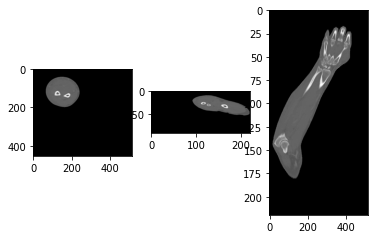

In [211]:
# TODO: YOUR CODE TO SEGMENT BONES


new_mask = (dicom_array.copy()).astype(np.int16)
new_mask[new_mask < 700 ] = 0
new_mask[new_mask > 3000] = 0


a1 = plt.subplot(1,3 , 1)
plt.imshow(new_mask[:, :, 110], cmap = 'gray')
a1.set_aspect(ax_aspect)


# TODO: YOUR CODE FOR SAGITTAL

a2 = plt.subplot(1, 3, 2)
plt.imshow(new_mask[:, 110, :], cmap = 'gray')
a2.set_aspect(sag_aspect)


# TODO: YOUR CODE FOR CORONAL

a3 = plt.subplot(1, 3, 3)
plt.imshow(new_mask[110, :, :].T, cmap = 'gray')
a3.set_aspect(cor_aspect)

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""